In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
train = pd.read_csv("../input/train.csv")
train.head() #use to print top 5 entries

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe() # describe function is use to show brief description about dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


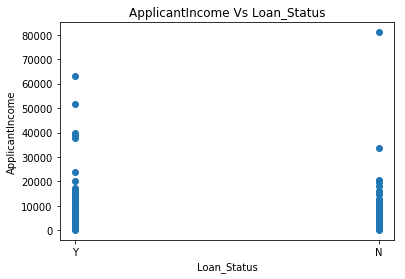

In [5]:
import matplotlib.pyplot as plt
plt.scatter(train['Loan_Status'],train['ApplicantIncome'])
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.title("ApplicantIncome Vs Loan_Status")
plt.show()

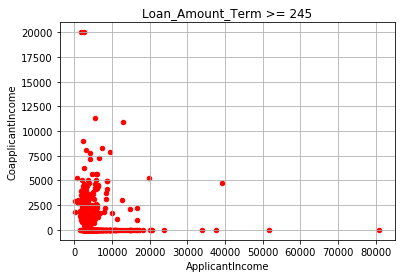

In [6]:
train[train.Loan_Amount_Term >= 245].plot(kind='scatter', x='ApplicantIncome', y='CoapplicantIncome',color="red")
plt.xlabel("ApplicantIncome")
plt.ylabel("CoapplicantIncome")
plt.title("Loan_Amount_Term >= 245")
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

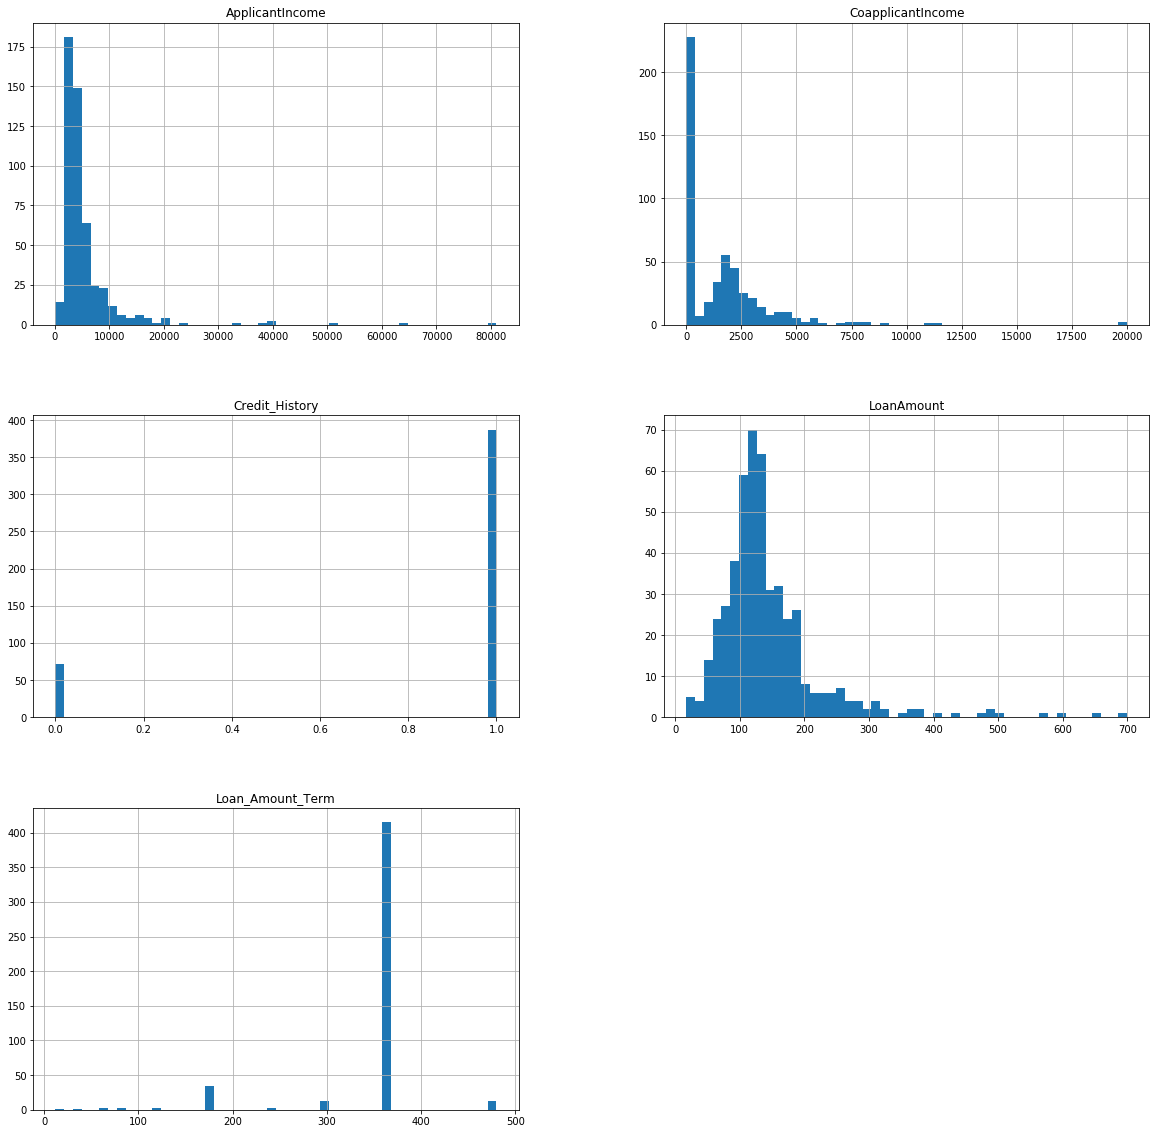

In [7]:
train.hist(bins=50,figsize=(20,20))
plt.show

In [8]:
co=train.corr()
co

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.121292,0.583289,-0.069086,-0.031342
CoapplicantIncome,-0.121292,1.000000,0.205980,0.006561,-0.028496
LoanAmount,0.583289,0.205980,1.000000,0.030737,-0.032947
Loan_Amount_Term,-0.069086,0.006561,0.030737,1.000000,0.018218
Credit_History,-0.031342,-0.028496,-0.032947,0.018218,1.000000


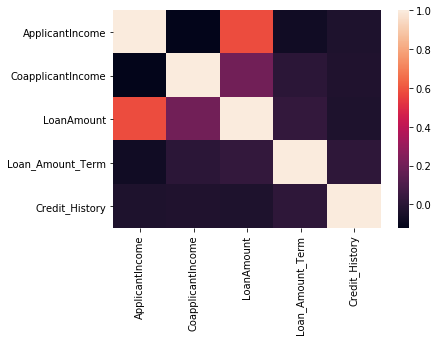

In [9]:
import seaborn as sns 
sns.heatmap(co)

In [10]:
#spliting dataset into X and Y

X=train.drop(['Loan_Status','Loan_ID'],axis=1) #data set
Y=train['Loan_Status'] #labels

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
Y=label_encoder.fit_transform(Y)

#this process can also be done by maping
#Y=train['Loan_Status'].map({'N':0,'Y':1}) this is the alternative way of label encoding

In [12]:
X #this is new input dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
495,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural
497,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban


In [13]:
X.info() #use to check the datatype of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Gender               491 non-null object
Married              497 non-null object
Dependents           488 non-null object
Education            500 non-null object
Self_Employed        473 non-null object
ApplicantIncome      500 non-null int64
CoapplicantIncome    500 non-null float64
LoanAmount           482 non-null float64
Loan_Amount_Term     486 non-null float64
Credit_History       459 non-null float64
Property_Area        500 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 43.1+ KB


In [14]:
X.isnull().sum() # this function is use to check null values in dataset

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [15]:
#now we are filling null values in dataset

In [16]:
X['Gender'].value_counts() # count all unique values in column

Male      400
Female     91
Name: Gender, dtype: int64

In [17]:
X['Gender'].fillna('Male',inplace=True) #filling null values with most occuring values

In [18]:
X['Married'].value_counts()

Yes    322
No     175
Name: Married, dtype: int64

In [19]:
X['Married'].fillna('Yes',inplace=True)

In [20]:
X['Dependents'].value_counts()

0     288
1      81
2      79
3+     40
Name: Dependents, dtype: int64

In [21]:
X['Dependents'].fillna(0,inplace=True)

In [22]:
X['Self_Employed'].value_counts()

No     407
Yes     66
Name: Self_Employed, dtype: int64

In [23]:
X['Self_Employed'].fillna('No',inplace=True)

In [24]:
mean_loan=X['LoanAmount'].mean()
X['LoanAmount'].fillna(mean_loan,inplace=True)

In [25]:
X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mean(),inplace=True)
X['Credit_History'].fillna(X['Credit_History'].mean(),inplace=True)

In [26]:
X.isnull().sum() #now we have repalced all the null values with respective mode in textual feilds and mean in numeric feilds

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [27]:
X=pd.get_dummies(X) #changes the alphabetical data into numerical data in adding more feild(this is done for machine to learn more properly and accuratly)

In [28]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,144.020747,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [29]:
X.shape

(500, 21)

In [30]:
#now we are going to split dataset into traing data and testing data

In [31]:
from sklearn.model_selection import train_test_split #sklearn is a package in  python and model_selection is a class of this package from which train_test_split function is called
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25)

In [32]:
X_train.shape

(375, 21)

In [33]:
X_test.shape

(125, 21)

In [34]:
Y_train.shape

(375,)

In [35]:
Y_test.shape

(125,)

In [36]:
#now applying logistic regression model for training the machine
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#now applying SVC model for training the machine

from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, Y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
#now applying GaussianNB model for training the machine

from sklearn.naive_bayes import GaussianNB
n_b = GaussianNB()
n_b.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
#now applying DecisionTreeClassifier model for training the machine

from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
#now applying KNeighborsClassifier model for training the machine

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
#now showing score of every model

In [42]:
print(lr.score(X_test, Y_test))
print(dtf.score(X_test, Y_test))
print(n_b.score(X_test, Y_test))
print(knn.score(X_test, Y_test))
print(svc.score(X_test, Y_test))

0.832
0.752
0.784
0.608
0.72


In [43]:
#printing confusion_matrix( we need confusion matrix when data set is imbalance)
from sklearn.metrics import confusion_matrix
y_predict=n_b.predict(X_test)
results=confusion_matrix(Y_test,y_predict)
print("Linear rergression confusion matrix:")
print(results)

Linear rergression confusion matrix:
[[17 18]
 [ 9 81]]


In [44]:
y_predict=dtf.predict(X_test)
results=confusion_matrix(Y_test,y_predict)
print("decision Tree forest confusion matrix:")
print(results)

decision Tree forest confusion matrix:
[[21 14]
 [17 73]]


In [45]:
y_predict=lr.predict(X_test)
results=confusion_matrix(Y_test,y_predict)
print("decision Tree forest confusion matrix:")
print(results)

decision Tree forest confusion matrix:
[[17 18]
 [ 3 87]]


In [46]:
y_predict=dtf.predict(X_test)
results=confusion_matrix(Y_test,y_predict)
print("decision Tree forest confusion matrix:")
print(results)

decision Tree forest confusion matrix:
[[21 14]
 [17 73]]


In [47]:
y_predict=svc.predict(X_test)
results=confusion_matrix(Y_test,y_predict)
print("decision Tree forest confusion matrix:")
print(results)

decision Tree forest confusion matrix:
[[ 0 35]
 [ 0 90]]


In [48]:
proba=lr.predict_proba(X_test)[0:5] #this shows the probability of any result being No or Yes
print(proba)

[[0.89871762 0.10128238]
 [0.26719885 0.73280115]
 [0.91361169 0.08638831]
 [0.23011364 0.76988636]
 [0.31977653 0.68022347]]


In [49]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [50]:
p=lr.predict(X_test)
p

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [51]:
Y_test

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [52]:
fpr,tpr,threshold=roc_curve(Y_test,lr.predict_proba(X_test)[:,1])

In [53]:
print('fpr:',fpr[0:5]),print('tpr:',tpr[0:5]),print('threshold:',threshold[0:5])

fpr: [0.         0.         0.         0.02857143 0.02857143]
tpr: [0.         0.01111111 0.02222222 0.02222222 0.3       ]
threshold: [1.97997436 0.97997436 0.97845219 0.96571814 0.86888256]


(None, None, None)

In [54]:
roc_auc=roc_auc_score(Y_test,lr.predict(X_test))
roc_auc


0.7261904761904763

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


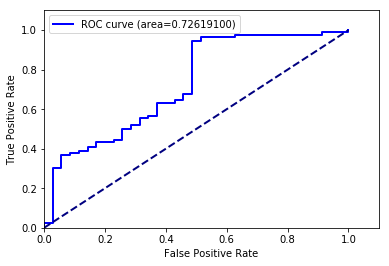

In [55]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr,tpr,color='blue',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [56]:
fpr1,tpr1,threshold1=roc_curve(Y_test,dtf.predict_proba(X_test)[:,1])

In [57]:
print('fpr:',fpr1[0:5]),print('tpr:',tpr1[0:5]),print('threshold:',threshold1[0:5])

fpr: [0.  0.4 1. ]
tpr: [0.         0.81111111 1.        ]
threshold: [2. 1. 0.]


(None, None, None)

In [58]:
roc_auc=roc_auc_score(Y_test,dtf.predict(X_test))
roc_auc


0.7055555555555556

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


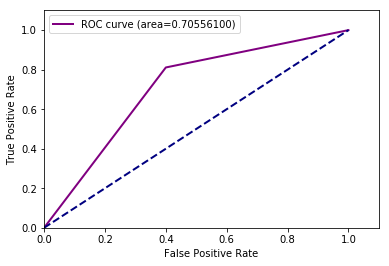

In [59]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr1,tpr1,color='purple',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [60]:
fpr2,tpr2,threshold2=roc_curve(Y_test,n_b.predict_proba(X_test)[:,1])

In [61]:
print('fpr:',fpr2[0:5]),print('tpr:',tpr2[0:5]),print('threshold:',threshold2[0:5])

fpr: [0.         0.         0.         0.02857143 0.02857143]
tpr: [0.         0.01111111 0.03333333 0.03333333 0.11111111]
threshold: [1.99537407 0.99537407 0.99215604 0.99105341 0.98002228]


(None, None, None)

In [62]:
roc_auc=roc_auc_score(Y_test,n_b.predict(X_test))
roc_auc


0.6928571428571428

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


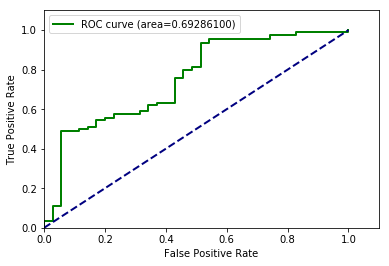

In [63]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr2,tpr2,color='green',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [64]:
fpr2,tpr2,threshold2=roc_curve(Y_test,n_b.predict_proba(X_test)[:,1])

In [65]:
print('fpr:',fpr2[0:5]),print('tpr:',tpr2[0:5]),print('threshold:',threshold2[0:5])

fpr: [0.         0.         0.         0.02857143 0.02857143]
tpr: [0.         0.01111111 0.03333333 0.03333333 0.11111111]
threshold: [1.99537407 0.99537407 0.99215604 0.99105341 0.98002228]


(None, None, None)

In [66]:
roc_auc=roc_auc_score(Y_test,n_b.predict(X_test))
roc_auc

0.6928571428571428

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


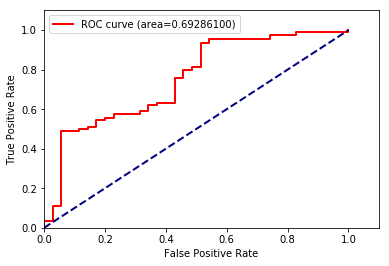

In [67]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr2,tpr2,color='red',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [68]:
fpr3,tpr3,threshold3=roc_curve(Y_test,knn.predict_proba(X_test)[:,1])

In [69]:
print('fpr:',fpr3[0:5]),print('tpr:',tpr3[0:5]),print('threshold:',threshold3[0:5])

fpr: [0.         0.05714286 0.31428571 0.68571429 0.97142857]
tpr: [0.         0.16666667 0.48888889 0.72222222 0.92222222]
threshold: [2.  1.  0.8 0.6 0.4]


(None, None, None)

In [70]:
roc_auc=roc_auc_score(Y_test,knn.predict(X_test))
roc_auc

0.5182539682539683

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


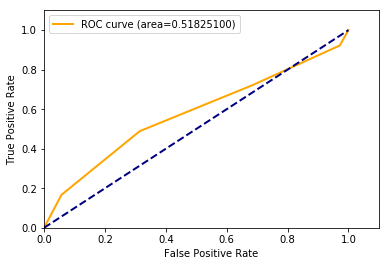

In [71]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr3,tpr3,color='orange',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [72]:
y_predict=knn.predict_proba(X_test)
y_predict[0:5]

array([[0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6]])

In [73]:
from sklearn.preprocessing import binarize #important for converting the probability values in binary form

In [74]:
y_pred=binarize(y_predict,0.60)
y_pred[0:5]

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.]])

In [75]:
y_pred1=y_pred[:,1]
y_pred1 # the output is in float we need to convert this output into integer type


array([0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0.])

In [76]:
y_pred2=y_pred1.astype(int)
y_pred2 # now the output is in integer type

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [77]:
tuned_result=confusion_matrix(Y_test,y_pred2)
print("confusion martics after tuning:")
print(tuned_result)

confusion martics after tuning:
[[24 11]
 [46 44]]


In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred2)

0.544